In [1]:
import data_handler as dh
import viz as viz

In [2]:
DATA_DIR = '../sample-data/data'
game_id = 1

In [3]:
event_data = dh.read_event_data(DATA_DIR,game_id)
event_data = dh.to_metric_coordinates(event_data)

home_events = event_data[event_data['Team'] == 'Home']
away_events = event_data[event_data['Team'] == 'Away']

home_shots = home_events[home_events['Type'] == 'SHOT']
away_shots = away_events[away_events['Type'] == 'SHOT']

home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')]
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')]

In [4]:
print(len(event_data))
print(event_data[:3])
event_data['Type'].value_counts()

1745
   Team       Type   Subtype  Period  Start Frame  Start Time [s]  End Frame  \
0  Away  SET PIECE  KICK OFF       1            1            0.04          0   
1  Away       PASS       NaN       1            1            0.04          3   
2  Away       PASS       NaN       1            3            0.12         17   

   End Time [s]      From        To  Start X  Start Y  End X  End Y  
0          0.00  Player19       NaN      NaN      NaN    NaN    NaN  
1          0.12  Player19  Player21     -5.3     7.48   5.30   4.76  
2          0.68  Player21  Player15      5.3     4.76   8.48  19.72  


PASS              799
RECOVERY          278
BALL LOST         257
CHALLENGE         233
SET PIECE          77
BALL OUT           51
SHOT               24
FAULT RECEIVED     22
CARD                4
Name: Type, dtype: int64

In [5]:
print(len(home_shots))
print(len(away_shots))

print(len(home_goals))
print(len(away_goals))

18
6
3
0


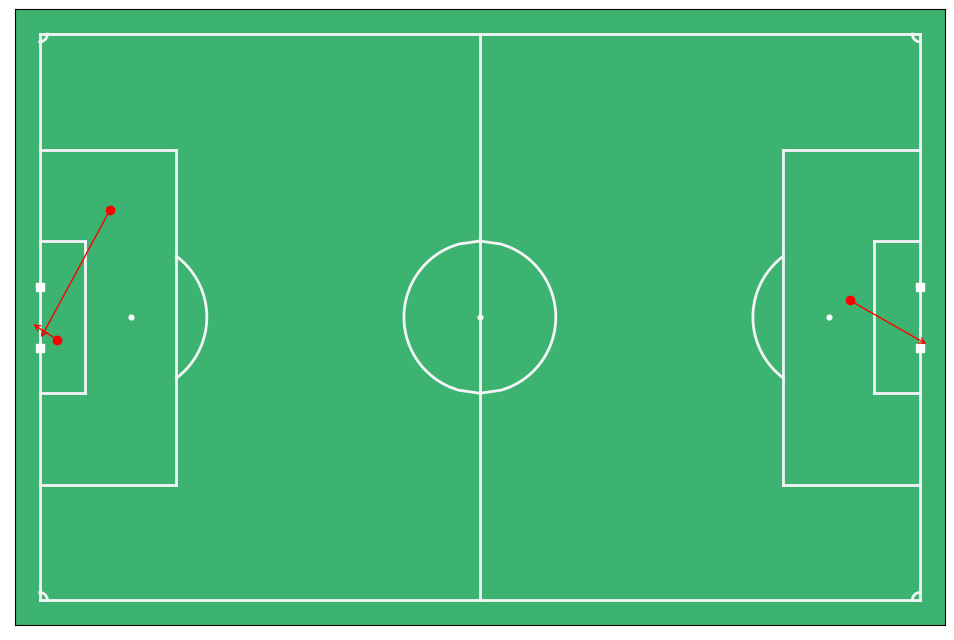

In [6]:
fig,axes = viz.plot_pitch()

for i,goal in home_goals.iterrows():
    axes.plot(goal['Start X'], goal['Start Y'], 'ro')
    axes.annotate('', xy=(goal['End X'], goal['End Y']), xytext=(goal['Start X'], goal['Start Y']), alpha=0.6, arrowprops=dict(arrowstyle='->',color='r'))



(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

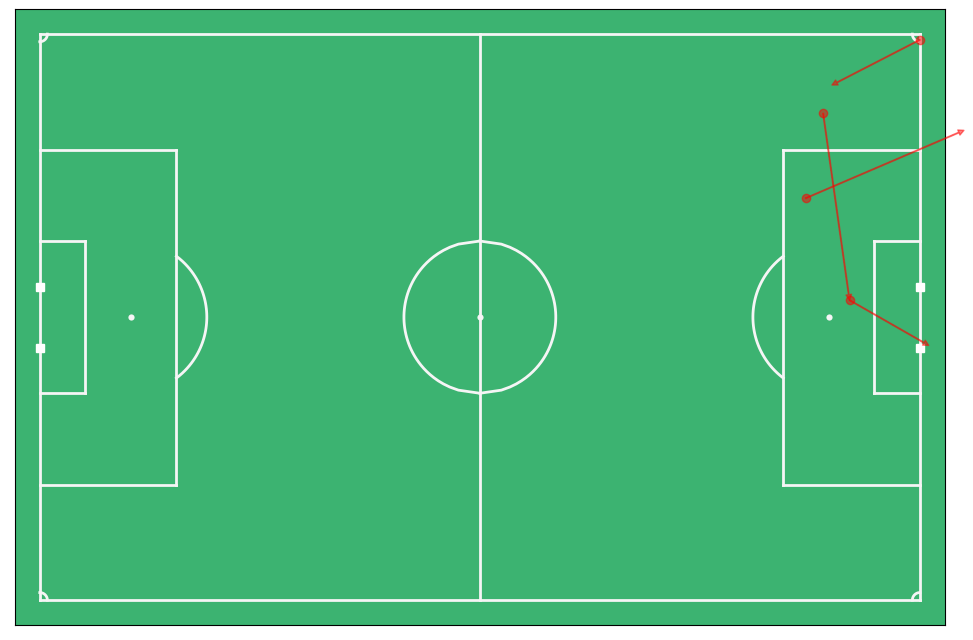

In [7]:
fig1,axes1 = viz.plot_pitch()
goal = home_goals.iloc[0]
idx = home_goals.index[0]
# print(event_data.loc[idx-4:idx])
viz.plot_events(event_data.loc[idx-4:idx], figax=(fig1,axes1), indicators=['Marker','Arrow'])

In [8]:
tracking_home = dh.read_tracking_data(DATA_DIR, game_id, 'Home')
tracking_away = dh.read_tracking_data(DATA_DIR, game_id, 'Away')

Reading team: home
Reading team: away


In [9]:
print( tracking_home.columns )

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


In [10]:
tracking_home = dh.to_metric_coordinates(tracking_home)
tracking_away = dh.to_metric_coordinates(tracking_away)

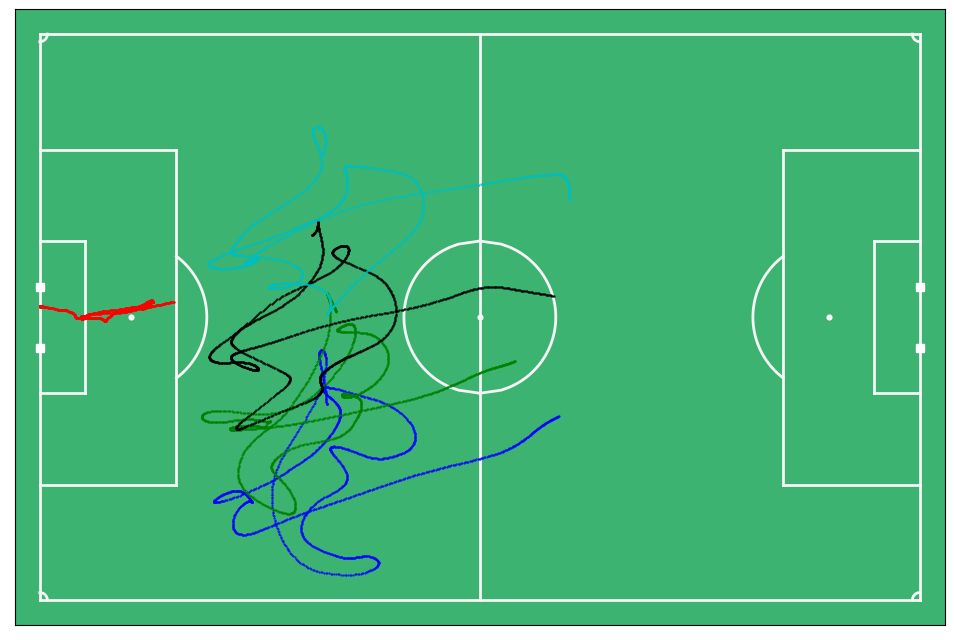

In [11]:
fig,ax = viz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', markersize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', markersize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', markersize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', markersize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', markersize=1)

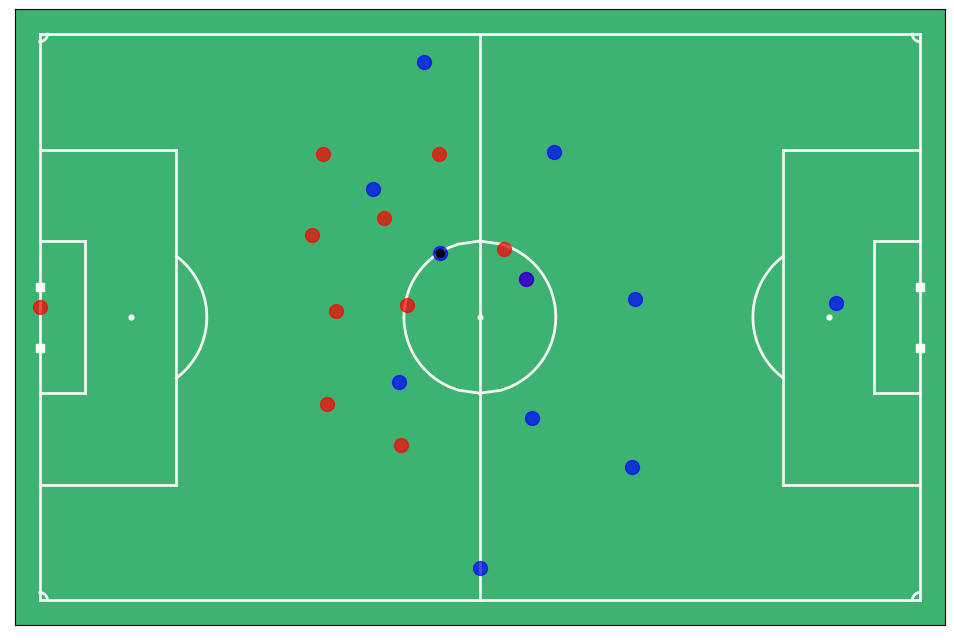

In [12]:
KO_Frame = event_data.loc[0]['Start Frame']
fig,ax = viz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )